# Real estate sale ads research

We have the data of the Yandex.RealEstate service — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. It is necessary to determine the market value of real estate. Our task is to set the parameters. This will allow us to build an automated system: it will track anomalies and fraudulent activity.

There are two types of data available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

**Project name**

Research of ads for the sale of apartments

**Project Description**

In the course of this study, we will analyze the data provided by the Yandex.RealEstate service — archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years

**The purpose of the investigation**

Learn to determine the market value of real estate

**The essence of research**

To analyze the data, the results of which will help to build an automated system that will track anomalies and fraudulent activity

**Research objectives**

Perform preprocessing of the initial data - fill in the gaps, work out anomalies and analyze the half-formed data array to answer the questions posed in the research goals

**Initial data**

For the study, a table has been presented, which includes about 23.5 thousand records on the sale of real estate. The table includes information about the price, parameters of the property, geodata

**This study will be divided into several parts**

Часть 1. [Data overview](#Data-overview)

Часть 2. [Data preprocessing](#Data-preprocessing)

1. [total_images](#total_images)
2. [last_priceвления](#last_price)
3. [total_area](#total_area)
4. [first_day_exposition](#first_day_exposition)
5. [rooms](#rooms)
6. [ceiling_height](#ceiling_height)
7. [floors_total](#floors_total)
8. [living_area](#living_area)
9. [is_apartment](#is_apartment)
10. [kitchen_area](#kitchen_area)
11. [balcony](#balcony)
12. [locality_name](#locality_name)

Часть 3. [Calculations and adding new columns to the table](#Calculations-and-adding-new-columns-to-the-table)
1. [Calculating the price per square meter](#Calculating-the-price-per-square-meter)
2. [Adding Date columns](#Adding-Date-columns)
3. [Type of apartment floor](#Type-of-apartment-floor)
4. [Distance to the city center in kilometers](#Distance-to-the-city-center-in-kilometers)

Часть 4. [Research data analysis](#Research-data-analysis)
1. [Studying the parameters of objects](#Studying-the-parameters-of-objects)
2. [The speed of sale of apartments](#The-speed-of-sale-of-apartments)
3. [Factors influencing the cost of the object](#Factors-influencing-the-cost-of-the-object)
4. [Average price per square meter](#Average-price-per-square-meter)
5. [Average price per kilometer](#Average-price-per-kilometer)

Часть 5. [General conclusion](#General-conclusion)

### Data overview

In [1]:
import pandas as pd
import matplotlib as plt
import warnings
warnings.filterwarnings('ignore')

try:
    data = pd.read_csv('D:/Документы/LinkedIn/4 Исследовательский анализ данных/real_estate_data.csv', sep = '\t', decimal = '.')  # Локальный путь
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t', decimal = '.')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

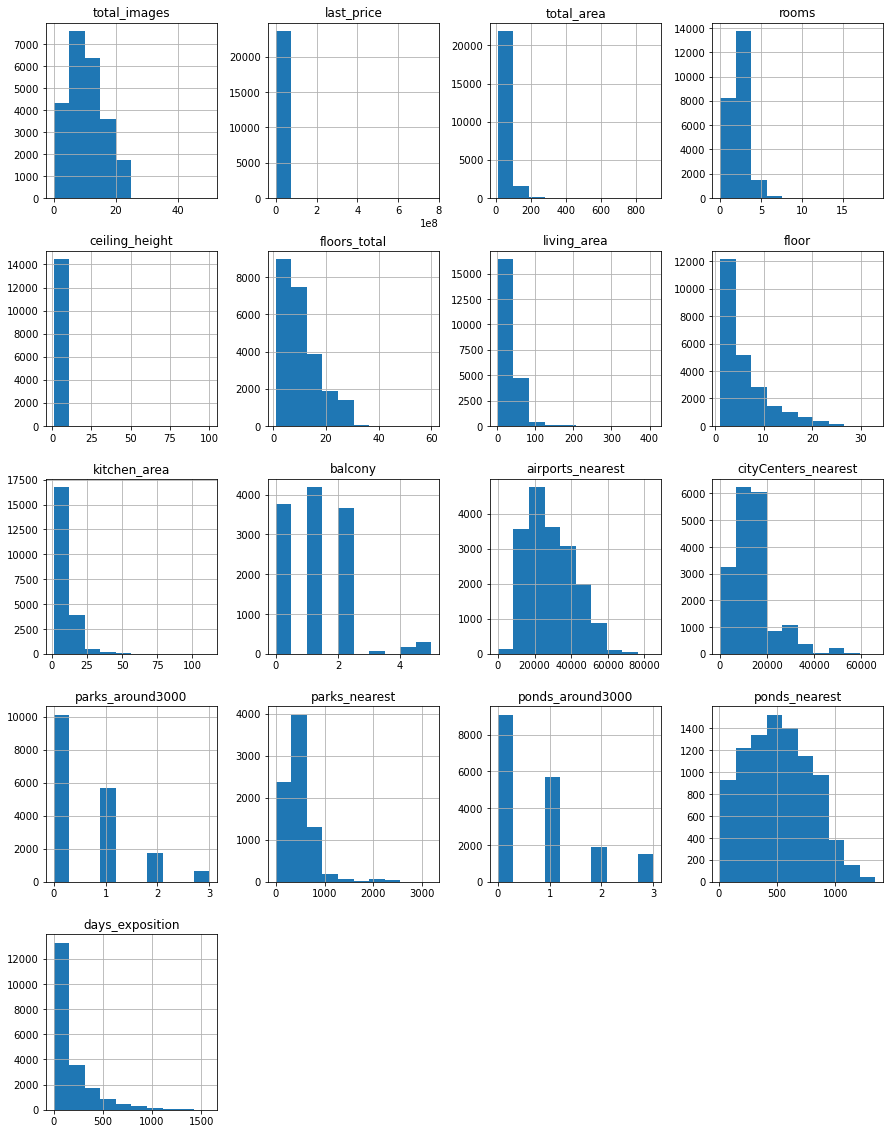

In [3]:
data.hist(figsize=(15, 20))

### Data preprocessing

After viewing the general information on the dataset, we will pre-process the data for each individual column.

#### total_images

The first column to view is total_images. Based on the information we reviewed in the previous paragraph, everything is fine with the column. There are no missing values, type int, minimum value 0, maximum 50, median is approximately equal to the average. The histogram shows that the number of ads with more than 25 photos is very small, but there is nothing unusual in this either. There are no reasons for adjustments.

#### last_price

The next column is last_price. There are no missing values, the float type is as it should be. The values are more complicated. We have the data, but it is possible to read and understand them, but it is not convenient. To make it easier to view and, accordingly, analyze them, we divide the values by a million. The apartment, most often, costs several million rubles and this format seems to be the most convenient. The column can be overwritten, since the essence of the data will not change, but the readability will greatly increase. To be understood by an outside observer, rename the column.

In [4]:
data['last_price'] = data['last_price']/1000000
data = data.rename(columns={'last_price': 'last_price_mln'})
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Let's look at the pricing information one more time

In [5]:
display(data['last_price_mln'].describe())

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price_mln, dtype: float64

The price allocation reflect our expectations. At the same time, the extreme minimum and maximum values are not characteristic. An apartment in St. Petersburg will not cost 12 thousand, it can potentially cost 763 million, but rarely. Let's check the minimum values first.

In [6]:
data['last_price_mln'].sort_values().head(10)

8793     0.01219
17456    0.43000
14911    0.43000
16274    0.44000
17676    0.45000
16219    0.45000
9581     0.45000
5698     0.45000
21912    0.47000
18867    0.47000
Name: last_price_mln, dtype: float64

There is only one obvious spike. Its removal will not affect further research in any way.

In [7]:
data = data.query('last_price_mln > 0.3')

Next, let's look at the maximum values.

In [8]:
data['last_price_mln'].sort_values(ascending=False).head(20)

12971    763.0000
19540    420.0000
14706    401.3000
1436     330.0000
15651    300.0000
22831    289.2384
16461    245.0000
13749    240.0000
5893     230.0000
8900     190.8700
19865    180.0000
19155    160.0000
2536     159.9840
16495    159.0000
1026     155.0000
7857     150.0000
15016    150.0000
22229    148.0000
12859    140.0000
3117     140.0000
Name: last_price_mln, dtype: float64

Of course, there are expensive apartments in St. Petersburg. It can be seen how the price is growing relatively smoothly, approaching the upper values. Just in case, we will check apartments worth from 200 million for their compliance with such a price.

In [9]:
data.query('last_price_mln > 200').sort_values('last_price_mln')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5893,3,230.0000,500.0,2017-05-31T00:00:00,6,NaN,7.0,NaN,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,50.0
13749,7,240.0000,410.0,2017-04-01T00:00:00,6,3.40,7.0,218.0,7,NaN,...,40.0,0.0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
16461,17,245.0000,285.7,2017-04-10T00:00:00,6,3.35,7.0,182.8,4,NaN,...,29.8,NaN,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
22831,18,289.2384,187.5,2019-03-19T00:00:00,2,3.37,6.0,63.7,6,NaN,...,30.2,NaN,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
15651,20,300.0000,618.0,2017-12-18T00:00:00,7,3.40,7.0,258.0,5,NaN,...,70.0,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
1436,19,330.0000,190.0,2018-04-04T00:00:00,3,3.50,7.0,95.0,5,NaN,...,40.0,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
14706,15,401.3000,401.0,2016-02-20T00:00:00,5,NaN,9.0,204.0,9,False,...,24.0,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
19540,8,420.0000,900.0,2017-12-06T00:00:00,12,2.80,25.0,409.7,25,NaN,...,112.0,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
12971,19,763.0000,400.0,2017-09-30T00:00:00,7,NaN,10.0,250.0,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


The characteristics of the apartments coincide with the cost. Apparently, there are no distortions of the cost.

#### total_area

The next column is total_area

In [10]:
display(data['total_area'].describe())

count    23698.000000
mean        60.346598
std         35.653434
min         12.000000
25%         40.000000
50%         52.000000
75%         69.875000
max        900.000000
Name: total_area, dtype: float64

The data type in the column is correct, the minimum, average and maximum values are real. There are no incorrect values in the column

#### first_day_exposition

The next column is first_day_exposition. In this column, the data is presented in the object format, which must be converted to datetime, discarding hours and minutes

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

The format has been converted. Let's check the minimum and maximum values just in case

In [12]:
data['first_day_exposition'].describe()

count                   23698
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

Values are correct. We can move on to the next column.

#### rooms

In the column rooms all rows are filled in, the data type matches. The only things to check are the minimum and maximum values

In [13]:
data['rooms'].describe()

count    23698.000000
mean         2.070639
std          1.078428
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

The values are also fine. So we can move to the next column.

#### ceiling_height

The ceiling_height column has the correct data type, some of the values are skipped, which is also normal, since not all indicate the height of the ceilings. Let's check the maximum and minimum values for anomalies.

In [14]:
data['ceiling_height'].describe()

count    14503.000000
mean         2.771500
std          1.261099
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

The minimum and maximum values are incorrect. Let's look at them. Let's start with the minimum

In [15]:
data['ceiling_height'].sort_values().head(10)

22590    1.00
5712     1.20
16934    1.75
11352    2.00
19329    2.00
22960    2.00
20520    2.00
4212     2.00
19098    2.00
5850     2.00
Name: ceiling_height, dtype: float64

Let's take 2 meters as the minimum bar. Only three apartments have lower ceilings. Delete these lines. They will not affect the overall sample.

In [16]:
data = data.query('ceiling_height > 1.9 or ceiling_height != ceiling_height')
data['ceiling_height'].sort_values().head(5)

19329    2.0
20520    2.0
19098    2.0
2572     2.0
5850     2.0
Name: ceiling_height, dtype: float64

Next, let's look at the maximum values

In [17]:
data['ceiling_height'].sort_values(ascending=False).head(30)

22869    100.0
22336     32.0
3148      32.0
21377     27.5
21824     27.0
20478     27.0
5807      27.0
10773     27.0
17857     27.0
5246      27.0
22938     27.0
4876      27.0
5669      26.0
355       25.0
9379      25.0
6246      25.0
4643      25.0
14382     25.0
11285     25.0
18545     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
17442      8.0
15743      8.0
3474       8.0
20264      6.0
Name: ceiling_height, dtype: float64

There are quite a lot of incorrect values. Suppose that when specifying a height of 20 m. users put a comma in the wrong place. Divide the values by 10 and overwrite.

In [18]:
data.loc[data['ceiling_height'] > 19, 'ceiling_height'] = data.loc[data['ceiling_height'] > 19, 'ceiling_height'] / 10

In [19]:
data['ceiling_height'].sort_values(ascending=False).head(10)

15061    14.0
22309    10.3
22869    10.0
5863      8.3
17442     8.0
3474      8.0
15743     8.0
20264     6.0
21227     5.8
1388      5.6
Name: ceiling_height, dtype: float64

As a result, there are 3 values above 10 meters left. It is difficult to imagine such ceilings. Delete them. Deleting 3 values will not distort the selection.

In [20]:
data = data.query('ceiling_height < 10 or ceiling_height != ceiling_height')

#### floors_total

The next column is floors_total. A distinctive feature of the column is the presence of a small number of NaN values. They are less than a percentage of the total. Let's look at these lines to find the relationship.

In [21]:
data.query('floors_total != floors_total')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11.640000,65.2,2018-10-02,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2.438033,28.1,2016-11-23,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9.788348,70.8,2015-08-01,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6.051191,93.6,2017-04-06,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3.600000,39.0,2017-04-22,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8.500000,63.5,2017-05-24,2,2.8,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4.574160,64.5,2017-04-02,2,NaN,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14.569263,110.4,2016-11-20,3,NaN,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21.187872,123.3,2017-04-25,3,NaN,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


The relationship is not visible. Probably an error in the data. It will be incorrect to substitute any values here, as this may distort the values of the first/last floor. At the same time, since the lost data is less than 1% of the total sample, the complete deletion of these rows will not affect the sample. Therefore, the most optimal option would be to delete it.

In [22]:
data = data.dropna(subset=['floors_total'])

In [23]:
data.query('floors_total != floors_total')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Now let's check the maximum and minimum values

In [24]:
data['floors_total'].describe()

count    23606.000000
mean        10.672287
std          6.594789
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Everything is ok with the minimum, but the maximum is too big. There are no such houses in St. Petersburg. Let's look at the upper values.

In [25]:
data['floors_total'].sort_values(ascending=False).head(10)

2253     60.0
16731    52.0
5807     36.0
397      36.0
11079    36.0
9579     35.0
20938    35.0
5749     35.0
18218    35.0
12960    35.0
Name: floors_total, dtype: float64

The tallest residential building in St. Petersburg is 37 floors. We will delete everything above. There are only 2 such values

In [26]:
data = data.query('floors_total < 38')
data['floors_total'].sort_values(ascending=False).head(10)

5807     36.0
397      36.0
11079    36.0
20938    35.0
9186     35.0
5749     35.0
12888    35.0
21809    35.0
8496     35.0
15982    35.0
Name: floors_total, dtype: float64

Finally, we convert floor_total to int type.

In [27]:
data['floors_total'] = data['floors_total'].astype('int')

#### living_area

The next column is living_area. There are also empty values in it. There are already about 2 thousand of them, so it is impossible to painlessly remove them from the dataframe. Let's check the relationship of errors:

In [28]:
data.query('living_area != living_area')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64.900,159.00,2015-07-24,3,NaN,14,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7.915,71.60,2019-04-18,2,NaN,24,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2.200,32.80,2018-02-19,1,NaN,9,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1.990,45.80,2017-10-28,2,2.50,5,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5.350,40.00,2018-11-18,1,NaN,22,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5.950,80.30,2018-07-03,3,2.70,12,NaN,5,NaN,...,NaN,NaN,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6.400,88.00,2018-01-12,4,2.55,10,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2.450,45.60,2018-02-08,1,2.80,9,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2.500,35.00,2017-12-08,1,NaN,9,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


No correlations were found. We will restore the data by linking them to others. Let's look at the correlation of living_area with the total_area and rooms columns, having previously created a variable without Nan values of living_area:

In [29]:
not_nan_living_area = data.query('living_area == living_area')
display(not_nan_living_area['living_area'].corr(not_nan_living_area['total_area']))
not_nan_living_area['living_area'].corr(not_nan_living_area['rooms'])

0.939825003082085

0.8459837723157179

It can be seen that the best candidate for which living_area values can be restored is total_area. Let 's calculate the ratio of the values

In [30]:
not_nan_living_area['living_area'].mean() / not_nan_living_area['total_area'].mean()

0.5737038465027144

Now, instead of Nan, insert the living_area values, the total_area values multiplied by 0.57 and rounded to two decimal places

In [31]:
data.loc[data['living_area'] != data['living_area'],
         'living_area'] = data.loc[data['living_area'] != data['living_area'], 'total_area'] * 0.57
data = data.round({'living_area':2})

Let's check the result. We had an empty value in the row with index 3

In [32]:
display(data. head())
display(data.info())

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23604 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23604 non-null  int64         
 1   last_price_mln        23604 non-null  float64       
 2   total_area            23604 non-null  float64       
 3   first_day_exposition  23604 non-null  datetime64[ns]
 4   rooms                 23604 non-null  int64         
 5   ceiling_height        14486 non-null  float64       
 6   floors_total          23604 non-null  int32         
 7   living_area           23604 non-null  float64       
 8   floor                 23604 non-null  int64         
 9   is_apartment          2774 non-null   object        
 10  studio                23604 non-null  bool          
 11  open_plan             23604 non-null  bool          
 12  kitchen_area          21374 non-null  float64       
 13  balcony         

None

Everything is calculated correctly. Another point that should not be - the living area cannot be larger than the total area. Let's check if there are such lines:

In [33]:
data.query('living_area > total_area')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


There are no such lines. So we can move on to floor. In this column, all values are filled in, the type is correct. The only thing that can be wrong is the floor is higher than the total floors in the building. Let's check if there are such lines:

In [34]:
display((data['floor'] > data['floors_total']).sum())

0

There are no such lines, as in the previous case.

#### is_apartment

The next column is_apartment. Most likely, the missing values tell us that the object is not an apartment. The most logical thing would be to label this as False. First, let's see how the non-Nan rows of the column are filled

In [35]:
data.query('is_apartment == is_apartment')['is_apartment'].unique()

array([False, True], dtype=object)

Everything is fine in the filled lines. Assign the value False to the empty rows and the entire column type bool

In [36]:
data['is_apartment'].fillna(value=False, inplace=True)
data['is_apartment'] = data['is_apartment'].astype('bool')

#### kitchen_area

The following columns - studio and open_plan are filled in correctly, so let's move on to kitchen_area

The first thing to check is whether there are no values greater than total_area

In [37]:
data.query('kitchen_area > total_area')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


There are no such values, we can proceed to filling in the gaps. They need to be filled in, not deleted, because there are too many gaps. Let's do it by analogy with living_area

In [38]:
not_nan_kitchen_area = data.query('kitchen_area == kitchen_area')

display(not_nan_kitchen_area['kitchen_area'].corr(not_nan_kitchen_area['total_area']))
not_nan_kitchen_area['kitchen_area'].corr(not_nan_kitchen_area['living_area'])

0.6095644744706662

0.4366010750359653

The correlation with total_area, although not as large as in the previous case, is still there. And, given that the Nan values are about 10%, such an approximate substitution will not greatly affect the final result

In [39]:
not_nan_living_area['kitchen_area'].mean() / not_nan_living_area['total_area'].mean()

0.17493805078685695

In [40]:
data.loc[data['kitchen_area'] != data['kitchen_area'],
         'kitchen_area'] = data.loc[data['kitchen_area'] != data['kitchen_area'], 'total_area'] * 0.175
data = data.round({'kitchen_area':2})

#### balcony

Next - balcony. Suppose, where the number of balconies is not specified, there are none and there should be 0. Put it instead of empty values and bring everything to the int type.

In [41]:
data['balcony'].fillna(value=0, inplace=True)
data['balcony'] = data['balcony'].astype('int')

In [42]:
data.query('balcony!=balcony')

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


#### locality_name

The next column is locality_name. In it, some lines are not filled in. Probably, the property being sold is located outside the locality. Let's write "Other" in such lines.
Also check the column for implicit duplicates and remove them.

In [43]:
display(data['locality_name'].sort_values().unique())
len(data['locality_name'].unique())

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

365

It will be difficult to check in this format. Let's bring to at least some uniformity the types of settlements

In [44]:
data['locality_name'] = data['locality_name'].replace('посёлок', 'поселок', regex=True)
data['locality_name'] = data['locality_name'].replace('городской поселок', 'поселок городского типа', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок при железнодорожной станции', 'поселок станции', regex=True)
data['locality_name'] = data['locality_name'].replace('садоводческое некоммерческое товарищество', 'садовое товарищество', regex=True)
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино', regex=True)
len(data['locality_name'].unique())

321

It was possible to remove several duplicates. The number of unique values decreased by more than 10 percent. It remains to remove Nan

In [45]:
data['locality_name'].fillna(value="Другое", inplace=True)
data = data.reset_index(drop=True)

This concludes the analysis of the columns that users entered. As a result of processing custom columns, we deleted only 95 rows. Quite a bit and will not affect the result. Then there are columns with geo-data. In this case, it will not be possible to fill in the gaps correctly in any way, since there are too many unknowns. Let's leave the table in this form and move on to the next part of the project.

### Calculations and adding new columns to the table

#### Calculating the price per square meter

Earlier, we converted the price into millions for ease of perception. Square meters are usually counted in thousands. This is what we will do in the new column + round the values to two decimal places.

In [46]:
data['one_meter_price_ths'] = data['last_price_mln'] / data['total_area'] * 1000
data = data.round({'one_meter_price_ths':2})
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price_ths
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120.37
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82.92
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92.79
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408.18
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100.00


#### Adding Date columns

Adding columns:
the day of the week of publication of the ad;
month of publication of the ad;
year of publication of the announcement;

In [47]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price_ths,week_day,month,year
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,120.37,3,3,2019
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82.92,1,12,2018
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92.79,3,8,2015
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,408.18,4,7,2015
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,100.00,1,6,2018


#### Type of apartment floor

In [81]:
def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_category, axis=1)
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price_ths,week_day,month,year,floor_type,km_city_centers_nearest
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,8.0


#### Distance to the city center in kilometers

Rename the city_center column to the correct view and calculate the distance to the city center in kilometers:

In [49]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
data['km_city_centers_nearest'] = data['city_centers_nearest'] / 1000
data['km_city_centers_nearest'] = data['km_city_centers_nearest'].round()
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price_ths,week_day,month,year,floor_type,km_city_centers_nearest
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,8.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23604 entries, 0 to 23603
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23604 non-null  int64         
 1   last_price_mln           23604 non-null  float64       
 2   total_area               23604 non-null  float64       
 3   first_day_exposition     23604 non-null  datetime64[ns]
 4   rooms                    23604 non-null  int64         
 5   ceiling_height           14486 non-null  float64       
 6   floors_total             23604 non-null  int32         
 7   living_area              23604 non-null  float64       
 8   floor                    23604 non-null  int64         
 9   is_apartment             23604 non-null  bool          
 10  studio                   23604 non-null  bool          
 11  open_plan                23604 non-null  bool          
 12  kitchen_area             23604 n

### Research data analysis

#### Studying the parameters of objects

For analysis, we will select the necessary columns in a separate variable, since if we call data, Jupiter hides part of the columns.
At the beginning, let's look at the description of the data

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23604 entries, 0 to 23603
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23604 non-null  int64         
 1   last_price_mln           23604 non-null  float64       
 2   total_area               23604 non-null  float64       
 3   first_day_exposition     23604 non-null  datetime64[ns]
 4   rooms                    23604 non-null  int64         
 5   ceiling_height           14486 non-null  float64       
 6   floors_total             23604 non-null  int32         
 7   living_area              23604 non-null  float64       
 8   floor                    23604 non-null  int64         
 9   is_apartment             23604 non-null  bool          
 10  studio                   23604 non-null  bool          
 11  open_plan                23604 non-null  bool          
 12  kitchen_area             23604 n

In [52]:
data_for_analysis = data[['last_price_mln',
                          'total_area',
                          'rooms',
                          'ceiling_height',
                          'floors_total',
                          'living_area',
                          'kitchen_area',
                          'floor',
                          'floor_type',
                          'city_centers_nearest',
                          'airports_nearest',
                          'parks_nearest',
                          'week_day',
                          'month']]
data_for_analysis.head()

,last_price_mln,total_area,rooms,ceiling_height,floors_total,living_area,kitchen_area,floor,floor_type,city_centers_nearest,airports_nearest,parks_nearest,week_day,month
0,13.000,108.0,3,2.70,16,51.00,25.00,8,другой,16028.0,18863.0,482.0,3,3
1,3.350,40.4,1,NaN,11,18.60,11.00,1,первый,18603.0,12817.0,NaN,1,12
2,5.196,56.0,2,NaN,5,34.30,8.30,4,другой,13933.0,21741.0,90.0,3,8
3,64.900,159.0,3,NaN,14,90.63,27.82,9,другой,6800.0,28098.0,84.0,4,7
4,10.000,100.0,2,3.03,14,32.00,41.00,13,другой,8098.0,31856.0,112.0,1,6


In [53]:
data_for_analysis.describe()

,last_price_mln,total_area,rooms,ceiling_height,floors_total,living_area,kitchen_area,floor,city_centers_nearest,airports_nearest,parks_nearest,week_day,month
count,23604.000000,23604.000000,23604.000000,14486.000000,23604.000000,23604.000000,23604.000000,23604.000000,18096.000000,18073.000000,8039.000000,23604.000000,23604.000000
mean,6.541131,60.344253,2.071344,2.728062,10.668446,34.601111,10.501792,5.875953,14183.611240,28786.208654,490.560517,2.568209,6.399678
std,10.903486,35.652663,1.078495,0.292591,6.581752,22.365427,6.037775,4.871743,8611.698374,12624.507438,341.404753,1.788613,3.493486
min,0.430000,12.000000,0.000000,2.000000,1.000000,2.000000,1.300000,1.000000,181.000000,0.000000,1.000000,0.000000,1.000000
25%,3.400000,40.000000,1.000000,2.510000,5.000000,19.000000,7.000000,2.000000,9233.750000,18574.000000,288.000000,1.000000,3.000000
50%,4.650000,52.000000,2.000000,2.650000,9.000000,30.000000,9.000000,4.000000,13093.000000,26726.000000,455.000000,3.000000,6.000000
75%,6.799000,69.800000,3.000000,2.800000,16.000000,42.100000,12.000000,8.000000,16287.000000,37244.000000,612.000000,4.000000,10.000000
max,763.000000,900.000000,19.000000,8.300000,36.000000,409.700000,112.000000,33.000000,65968.000000,84869.000000,3190.000000,6.000000,12.000000


The first thing I would like to note is a quite small difference between the average and median values in almost all columns. There are only two columns in which the median and average are slightly different - price and floor. But even in them the difference is no more than one and a half times. In my opinion, this is due to the relative standardization of real estate. Ceilings cannot be 1000 meters high, which means that there are no very strong emissions. Similarly for other parameters - area, floor, etc. The similarity of the values in geodata is explained by the same thing - the size of the settlement is limited.
Let's analyze the column with the price in more detail. It is the price in this table that is the most volatile factor, which is not tied to any strict standards. At the beginning, we will build a histogram to see the price distribution graph.

<AxesSubplot:>

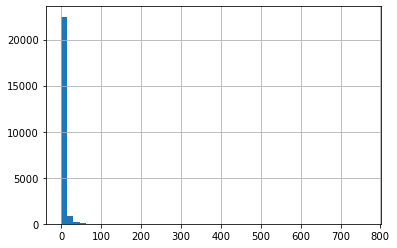

In [54]:
data_for_analysis['last_price_mln'].hist(bins=50)

The x-axis is very elongated, although the values on it are almost not visible. This means that there are lunges in the column that blur the view of the data. Let's remove lines with a price above 20 million from the dataframe. 75 percent of the values fit into 6.8 million rubles, so such a clipping will remove only the topmost layer of data and allow for better data analysis.

<AxesSubplot:>

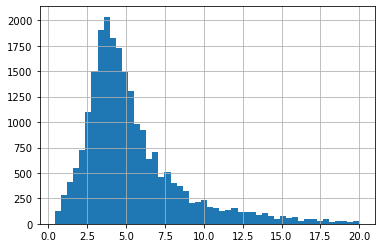

In [55]:
data_analysis_filtered = data_for_analysis.query('last_price_mln < 20')
data_analysis_filtered['last_price_mln'].hist(bins=50)

The graph corresponds to the Poisson distribution. Cut off at zero, has a long tail. From this graph, we can conclude that the data is correct and can be used in the future.

The next column is total_area. Let's look at the histogram for it

<AxesSubplot:>

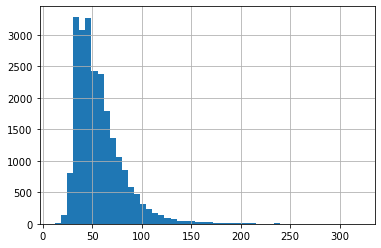

In [56]:
data_analysis_filtered['total_area'].hist(bins=50)

There is also a too long tail visible here. We will remove unnecessary values and limit the maximum to 150 meters

<AxesSubplot:>

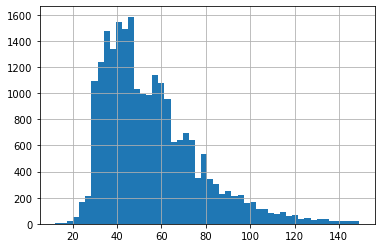

In [57]:
data_analysis_filtered = data_analysis_filtered.query('total_area < 150')
data_analysis_filtered['total_area'].hist(bins=50)

The graph has acquired a normal form. Corresponds to the normal distribution.

Next - rooms

<AxesSubplot:>

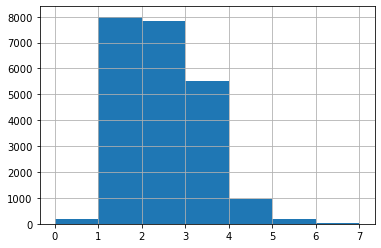

In [58]:
data_analysis_filtered['rooms'].hist(bins=7)

There is nothing to edit here. The graph also corresponds to the normal distribution.

In the ceiling_height column, we will limit the height to 4 meters. Most values fall within this range

<AxesSubplot:>

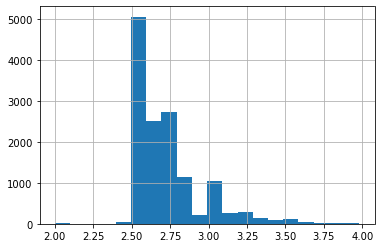

In [59]:
data_analysis_filtered = data_analysis_filtered.query('ceiling_height < 4')
data_analysis_filtered['ceiling_height'].hist(bins=20)

Here we can also notice a small splash of about 2 meters. Since 2 meters is not the most realistic height for a ceiling, let's assume that the data is not accurate. Perhaps the person incorrectly used the separator when entering the height. But we cannot correct these values, so we will limit the sample to a height of 2.25

<AxesSubplot:>

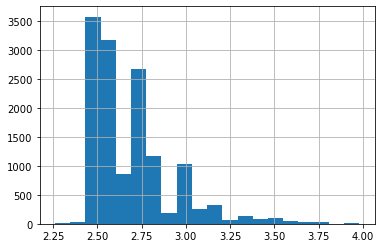

In [60]:
data_analysis_filtered = data_analysis_filtered.query('ceiling_height > 2.25')
data_analysis_filtered['ceiling_height'].hist(bins=20)

Such a graph already corresponds more to the distribution. According to the graph, the standardization of the data under consideration is noticeable. The graph goes stepwise, with a lag of 25 centimeters.

Next - floors_total. Let's limit the number of storeys to 25 floors and see the graph

<AxesSubplot:>

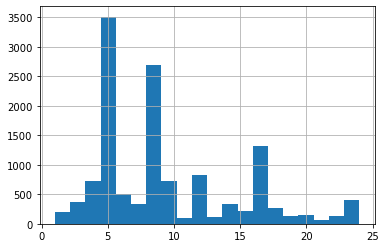

In [61]:
data_analysis_filtered = data_analysis_filtered.query('floors_total < 25')
data_analysis_filtered['floors_total'].hist(bins=20)

The "waves" of mass housing construction are very noticeable on the graph. 5-storey Khrushchevki, 9-storey Brezhnevki and modern high-rise construction.

living_area. Let's limit living_area to 100 squares and look at the graph

<AxesSubplot:>

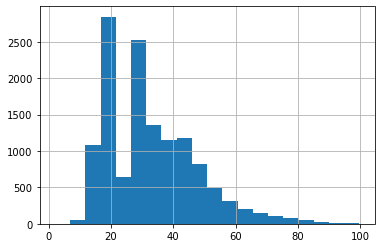

In [62]:
data_analysis_filtered = data_analysis_filtered.query('living_area < 100')
data_analysis_filtered['living_area'].hist(bins=20)

The graph shows a very strange dip at 22 meters. Perhaps this is a reason to report a problem with data collection

kitchen_area will be limited to 30 meters

<AxesSubplot:>

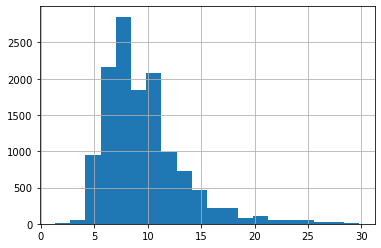

In [63]:
data_analysis_filtered = data_analysis_filtered.query('kitchen_area < 30')
data_analysis_filtered['kitchen_area'].hist(bins=20)

The graph, in general, corresponds to a normal distribution. There is a small dip in the middle, but it is not critical.

floor. We will not limit anything here, since we made a slice by floor_total before that

<AxesSubplot:>

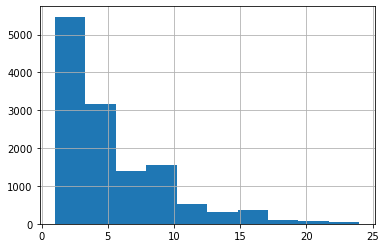

In [64]:
data_analysis_filtered['floor'].hist(bins=10)

The graph does not correspond to the normal distribution, but it should not correspond to it. Here is the question of the frequency of the presence of floors in different houses. The 1st floor is in all houses, and the 3rd only in three-storey and above.

city_center_nearest. Then there are the geodata. Let's look at the graph without slices

<AxesSubplot:>

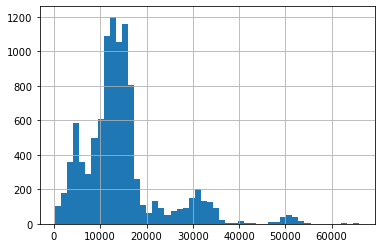

In [65]:
data_analysis_filtered['city_centers_nearest'].hist(bins=50)

Two strange bursts can be seen at 30 and 50 thousand meters. At the same time, 75% of the values fit into 16 thousand meters. Let's limit the data to 25 thousand meters

<AxesSubplot:>

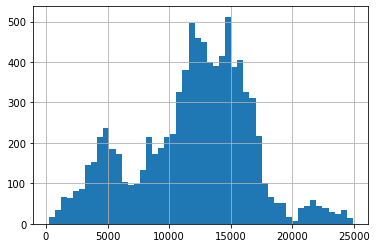

In [66]:
data_analysis_filtered = data_analysis_filtered.query('city_centers_nearest < 25000')
data_analysis_filtered['city_centers_nearest'].hist(bins=50)

Thus, the graph becomes similar to a normal distribution. There is only a small spike at 5 thousand. Perhaps 5 and 15 thousand is the placement of sleeping areas in small towns and St. Petersburg, respectively.

Distance from the airport

<AxesSubplot:>

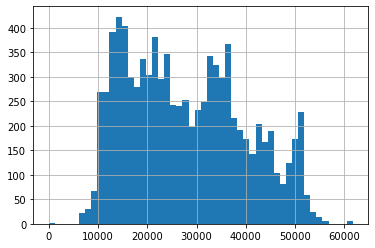

In [67]:
data_analysis_filtered['airports_nearest'].hist(bins=50)

Most likely, the distance from Pulkovo is shown here. In general, the distribution corresponds to reality - the first surge is the largest - St. Petersburg, the rest, slightly smaller - the outskirts of St. Petersburg and relatively populated cities in other directions from the airport.

Next - parks

<AxesSubplot:>

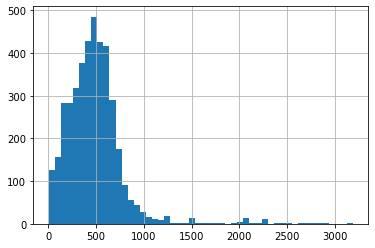

In [68]:
data_analysis_filtered['parks_nearest'].hist(bins=50)

Here the distribution is already more in line with normal, since the park is more distributed across the territories of the location. We will make a cut of 1500 meters

<AxesSubplot:>

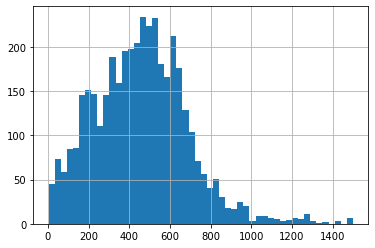

In [69]:
data_analysis_filtered = data_analysis_filtered.query('parks_nearest < 1500')
data_analysis_filtered['parks_nearest'].hist(bins=50)

Day of the week and month

<AxesSubplot:>

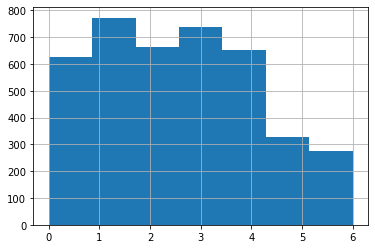

In [70]:
display(data_analysis_filtered['week_day'].hist(bins=7))

It is expected that people post less ads on Saturday and Sunday.

<AxesSubplot:>

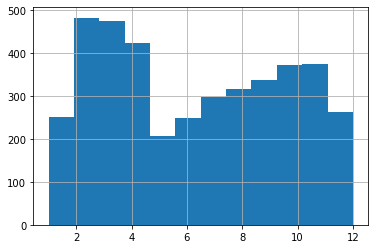

In [71]:
display(data_analysis_filtered['month'].hist(bins=12))

Here we also expect a conclusion - the May holidays and the new year are not the time to engage in real estate.

And let's see in the end what kind of table we got data_analysis_filtered

In [72]:
display(data_analysis_filtered.describe())
data_analysis_filtered.info()

,last_price_mln,total_area,rooms,ceiling_height,floors_total,living_area,kitchen_area,floor,city_centers_nearest,airports_nearest,parks_nearest,week_day,month
count,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4054.000000,4043.000000,4054.000000,4054.00000,4054.000000
mean,6.712456,60.409282,2.175382,2.775488,9.354218,35.594665,10.027950,5.141589,10437.047114,27990.592135,456.829798,2.51628,6.300937
std,3.282103,23.635024,0.972393,0.288058,4.941836,16.270638,4.126934,3.842852,4528.448184,10942.784954,229.733354,1.78214,3.487840
min,1.600000,12.000000,0.000000,2.300000,2.000000,5.400000,2.000000,1.000000,208.000000,6914.000000,3.000000,0.00000,1.000000
25%,4.390000,43.000000,1.000000,2.540000,5.000000,21.000000,7.000000,2.000000,6576.750000,19554.000000,294.250000,1.00000,3.000000
50%,5.700000,55.600000,2.000000,2.700000,9.000000,32.000000,9.000000,4.000000,11220.000000,26943.000000,456.000000,2.00000,6.000000
75%,8.200000,73.000000,3.000000,3.000000,12.000000,45.000000,11.900000,7.000000,14005.500000,36574.000000,602.750000,4.00000,9.000000
max,19.999000,148.600000,7.000000,3.980000,24.000000,99.600000,29.300000,24.000000,24850.000000,54723.000000,1499.000000,6.00000,12.000000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4054 entries, 0 to 23602
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_price_mln        4054 non-null   float64
 1   total_area            4054 non-null   float64
 2   rooms                 4054 non-null   int64  
 3   ceiling_height        4054 non-null   float64
 4   floors_total          4054 non-null   int32  
 5   living_area           4054 non-null   float64
 6   kitchen_area          4054 non-null   float64
 7   floor                 4054 non-null   int64  
 8   floor_type            4054 non-null   object 
 9   city_centers_nearest  4054 non-null   float64
 10  airports_nearest      4043 non-null   float64
 11  parks_nearest         4054 non-null   float64
 12  week_day              4054 non-null   int64  
 13  month                 4054 non-null   int64  
dtypes: float64(8), int32(1), int64(4), object(1)
memory usage: 459.2+ KB


After a series of slices, there are only 4 thousand values left. But the median is very close to the average, there are no extreme values and we are convinced of the correctness of the data presented.

#### The speed of sale of apartments

count    20432.000000
mean       180.914546
std        219.718380
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

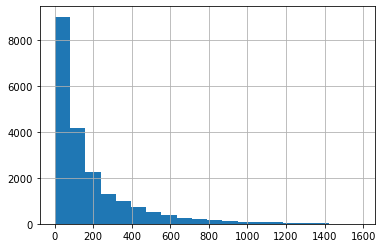

In [73]:
display(data['days_exposition'].describe())
data['days_exposition'].hist(bins=20)

As can be seen from the output above, the average is 180 days, the median is 95. The difference is very big. Let's take a closer look.

The tail of the graph is quite elongated. In addition, the "everyday" logic tells us that the sale of an apartment is longer than a year, i.e. 365 days is already long enough.
Let's limit the sample limits to two years, i.e. 730 days. It is not necessary to make a larger restriction, since in this case a large number of values will fall out.

<AxesSubplot:>

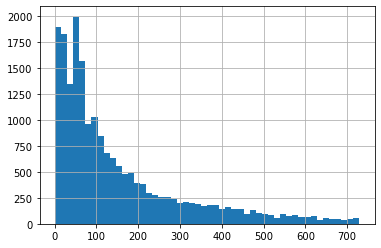

In [74]:
data.query('days_exposition < 730')['days_exposition'].hist(bins=50)

At the interval 0-100, a rather strong dip is noticeable. Let's look at it in more detail

<AxesSubplot:>

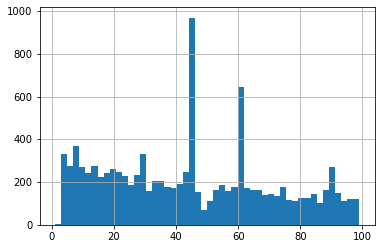

In [75]:
data.query('days_exposition < 100')['days_exposition'].hist(bins=50)

Very different values are visible at 45 and 60 days. I believe this is the standard term for placing an ad. That is, a person after the sale of an apartment does not remove / forgets to remove the ad, but after the deadline for submitting the ad, it is not renewed by the user, which means that it is no longer relevant for the user and the object has been withdrawn from sale.
In addition, minor spikes are noticeable at "equal" time intervals - a week, a month, three months. Without knowing the exact mechanics of yandex.real estate, it is difficult to say exactly about the nature of such spikes. These are either custom "alarm clocks" or the deadline for submitting an ad with a paid raise in Vyborg.

So after a closer look at the graph, we can say that a quick sale is a sale within 45 days, since during this time a significant part of the ads are removed and the corresponding peaks are visible, but still 75% of the ads remain. And the long sale will also count for 232 days. After this moment, the number of objects sold gradually falls below the mark of 20 pieces per day, that is, 1/1000 of the initial volume.

#### Factors influencing the cost of the object

In my opinion, to answer this question, it is best to look at the scattering diagram of the proposed values. Moreover, we will watch it on the maximally filtered data_analysis_filtered table, since it will show more accurate data.

0.8066042884331892

0.6982766166368095

0.6074586186995393

<AxesSubplot:title={'center':'year'}, xlabel='year'>

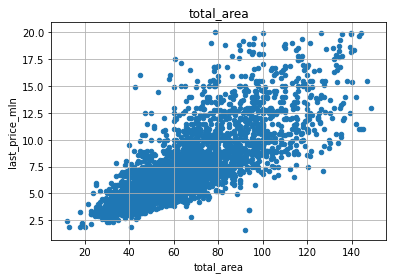

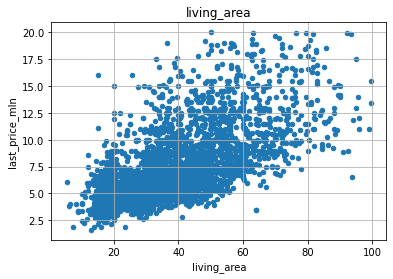

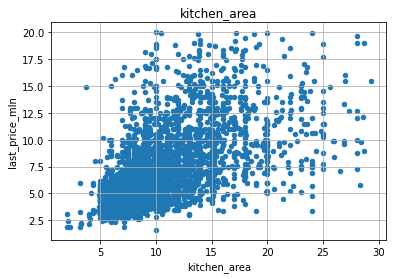

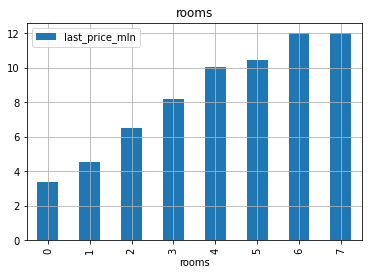

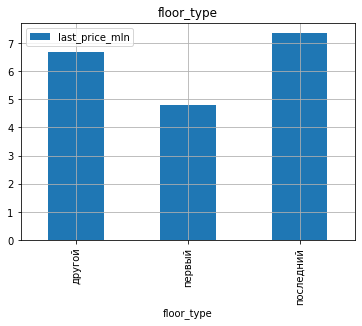

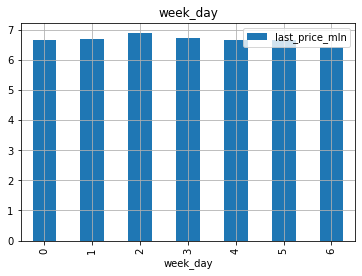

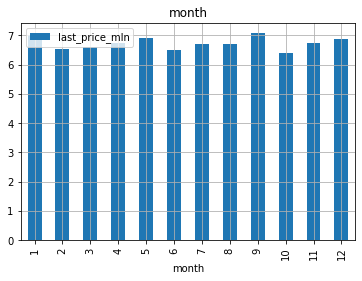

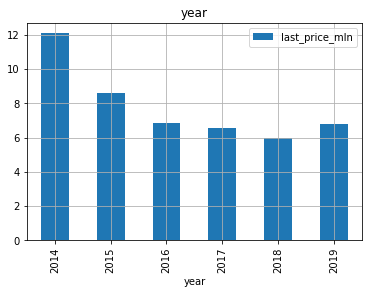

In [76]:
display(data_analysis_filtered['last_price_mln'].corr(data_analysis_filtered['total_area']))
data_analysis_filtered.plot(kind='scatter', x='total_area', y='last_price_mln', grid=True, title='total_area')
display(data_analysis_filtered['last_price_mln'].corr(data_analysis_filtered['living_area']))
data_analysis_filtered.plot(kind='scatter', x='living_area', y='last_price_mln', grid=True, title='living_area')
display(data_analysis_filtered['last_price_mln'].corr(data_analysis_filtered['kitchen_area']))
data_analysis_filtered.plot(kind='scatter', x='kitchen_area', y='last_price_mln', grid=True, title='kitchen_area')
data_analysis_filtered.pivot_table(index='rooms', values='last_price_mln').plot(kind='bar', grid=True, title='rooms')
data.pivot_table(index='floor_type', values='last_price_mln').plot(kind='bar', grid=True, title='floor_type')
data_analysis_filtered.pivot_table(index='week_day', values='last_price_mln').plot(kind='bar', grid=True, title='week_day')
data_analysis_filtered.pivot_table(index='month', values='last_price_mln').plot(kind='bar', grid=True, title='month')
data.pivot_table(index='year', values='last_price_mln').plot(kind='bar', grid=True, title='year')

Based on the graphs, the most determining factor among those listed is the total area, the number of rooms and the year of the ad submission. Also an important factor is the floor. The first floor is cheaper, and the difference between the other floors and the last is not so significant.

#### Average price per square meter

Let's calculate the average price of one square meter in 10 localities with the largest number of ads. Select the localities with the highest and lowest cost per square meter

In [82]:
data_pivot = data.pivot_table(index='locality_name', values='one_meter_price_ths', aggfunc=['count', 'mean'])
data_pivot.columns = ['count', 'mean']
print('10 localities with the largest number of ads\n',
      data_pivot.sort_values(by='count', ascending=False).head(10))
print()
print('localities with the highest cost per square meter\n',
      data_pivot.sort_values(by='mean', ascending=False).head(10))
print()
print('localities with the lowest cost per square meter\n',
      data_pivot.sort_values(by='mean').head(10))

10 localities with the largest number of ads
                    count        mean
locality_name                       
Санкт-Петербург    15644  114.848165
Мурино               586   86.041195
поселок Шушары       439   78.551595
Всеволожск           398   68.654447
Пушкин               369  103.125854
Колпино              338   75.424467
поселок Парголово    327   90.176177
Гатчина              307   68.746287
деревня Кудрово      299   92.473712
Выборг               237   58.141941

localities with the highest cost per square meter
                    count        mean
locality_name                       
Зеленогорск           24  115.121667
Санкт-Петербург    15644  114.848165
поселок Репино         4  104.240000
Пушкин               369  103.125854
Сестрорецк           183  101.757541
поселок Лисий Нос      3  100.663333
Кудрово              171  100.134503
деревня Мистолово     11   98.551818
поселок Левашово       1   97.000000
Другое                48   95.295417

localities wi

#### Average price per kilometer

Let's select apartments in St. Petersburg using the locality_name column and calculate the average price of each kilometer.

In [83]:
data.head()

,total_images,last_price_mln,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price_ths,week_day,month,year,floor_type,km_city_centers_nearest
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,120.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,NaN,11,18.60,1,False,...,NaN,0.0,NaN,81.0,82.92,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,NaN,5,34.30,4,False,...,90.0,2.0,574.0,558.0,92.79,3,8,2015,другой,14.0
3,0,64.900,159.0,2015-07-24,3,NaN,14,90.63,9,False,...,84.0,3.0,234.0,424.0,408.18,4,7,2015,другой,7.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,100.00,1,6,2018,другой,8.0


In [85]:
sp_data = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='km_city_centers_nearest',
                                                                       values='last_price_mln').round({'last_price_mln':2})

print('Average price per kilometer (mln):',
      ((sp_data.loc[sp_data.index[0],
                    'last_price_mln'] - sp_data.loc[sp_data.index[len(sp_data['last_price_mln'])-1], 'last_price_mln'])
      / len(sp_data['last_price_mln'])))

Average price per kilometer (mln): 0.907


Let's plot the dependence of the price on the distance from the center in order to analyze the data in more detail.

<AxesSubplot:xlabel='km_city_centers_nearest'>

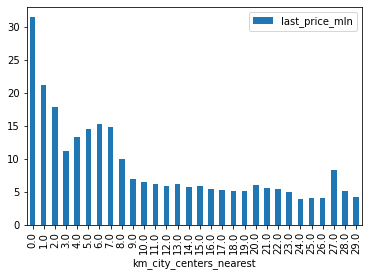

In [80]:
new_sp_data = data[['locality_name',
                    'km_city_centers_nearest',
                    'last_price_mln']].query('locality_name == "Санкт-Петербург"').round({'last_price_mln':2})

display(new_sp_data.groupby('km_city_centers_nearest').mean().plot(kind='bar'))

It turns out an interesting situation. The apartments closest to the center are expected to cost more and with each of the first three kilometers the price drops sharply. The question here is what exactly is considered the center. This is some kind of area or point. I will assume that this is still some area and this is the area of the historical development of St. Petersburg. In this case, such a sharp decline in prices can be explained by the industrial ring around the pre-revolutionary part of the city. Housing is cheaper in industrial areas. Then there is an increase in prices - these are elite residential areas, when the area is already quiet, but still not far from the center. After them there is a fairly smooth downward movement. The price difference between 12 and 23 kilometers from the center is not so big anymore. Accordingly, starting from about 9 kilometers from the center, the price elasticity from distance is no longer so great and other factors influence the price more.

### General conclusion

The main factors on which the cost of real estate depends are the total area, the number of rooms associated with it, proximity to the city center. An interesting point is that for several years from 2015 to 2018, the average cost of real estate decreased. The least active time in the real estate market is December, January and May, which just fall on holidays. The situation is similar on weekends. As the kitchen area, living space, lot value and the area of the corresponding premises grow, the correlation between them will decrease, although it is significant in the inexpensive segment.
Also worth noting is not the best quality of geolocation data - it may be worth reworking the user's choice of address. It would also be nice to adjust the system so that if there is no balcony or an item about apartments, it is set to 0 or False, and not Nan. At the same time, other parameters in which there are gaps - for example, ceiling height, can be corrected by the mandatory item when placing an ad, but this will complicate the process of user interaction with the system, since not everyone knows the ceiling height in a house or apartment. In addition, the factor is not critical, so we should not make it mandatory, even if there are such omissions in the statistics.